<a href="https://colab.research.google.com/github/jespimentel/eSAJ-atos.csv/blob/master/eSAJ_vers%C3%A3o_2_2_(2021_06).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Análise de 'atos.csv' do e-SAJ - Área da intimação do Fórum de Piracicaba

Versão: 2.2

@jespimentel

In [1]:
# Importação das bibliotecas necessárias
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns 
from IPython.display import display, HTML

In [2]:
# Leitura do arquivo 'atos.csv' para a criação do Dataframe
atos = pd.read_csv ('/content/atos.csv', sep = ';', encoding='ISO-8859-1', 
                    error_bad_lines=False, warn_bad_lines= False, low_memory = False, 
                    parse_dates=['Disponibilização', 'Data da intimação'], dayfirst=True)

In [3]:
# Tratamento da data de 'Disponibilização' para permitir a análise por mês
atos['mês_ano'] = pd.to_datetime(atos['Disponibilização']).dt.to_period('M')
atos['ano'] = pd.to_datetime(atos['Disponibilização']).dt.to_period('y')
atos.set_index('mês_ano', inplace=True)

In [4]:
atos.info()

<class 'pandas.core.frame.DataFrame'>
PeriodIndex: 35047 entries, 2021-06 to 2020-12
Freq: M
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Número do processo  35047 non-null  object        
 1   Foro                35047 non-null  object        
 2   Vara                35047 non-null  object        
 3   Especialização      35034 non-null  object        
 4   Cargo               35038 non-null  object        
 5   Disponibilização    35047 non-null  datetime64[ns]
 6   Prazo processual    35047 non-null  object        
 7   Movimentação        35047 non-null  object        
 8   Teor da intimação   35047 non-null  object        
 9   Classe principal    35047 non-null  object        
 10  Assunto principal   35028 non-null  object        
 11  Situação            35047 non-null  object        
 12  Tarjas              31027 non-null  object        
 13  Data da intimação   35047 non

In [ ]:
atos['Recebido por'].unique()

In [6]:
atos.dropna(subset=['Recebido por'], inplace=True)
atos.info()

<class 'pandas.core.frame.DataFrame'>
PeriodIndex: 34843 entries, 2021-06 to 2020-12
Freq: M
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Número do processo  34843 non-null  object        
 1   Foro                34843 non-null  object        
 2   Vara                34843 non-null  object        
 3   Especialização      34830 non-null  object        
 4   Cargo               34835 non-null  object        
 5   Disponibilização    34843 non-null  datetime64[ns]
 6   Prazo processual    34843 non-null  object        
 7   Movimentação        34843 non-null  object        
 8   Teor da intimação   34843 non-null  object        
 9   Classe principal    34843 non-null  object        
 10  Assunto principal   34824 non-null  object        
 11  Situação            34843 non-null  object        
 12  Tarjas              30830 non-null  object        
 13  Data da intimação   34843 non

In [7]:
atos['Recebido por'] = atos['Recebido por'].apply(lambda x: x[:10])
atos['Recebido por'].unique()

array(['José Eduar', 'Antonio Ca', 'Fernanda G', 'Luiz Sérgi',
       'Carlos Pau', 'JoÃ£o Fran', 'LUCIANO GO', 'Claudio Jo',
       'LUÍS PERSI', 'Milene Tel', 'PAULO KISH', 'Dênis Peix',
       'ALUISIO AN', 'SANDRA REG', 'Fábio Sale', 'João Carlo',
       'Alexandre ', 'GUSTAVO LU', 'ANDRE CAMI', 'Érika Ange',
       'ANDRE MANG', 'MARIANA BE'], dtype=object)

In [8]:
# Delimitação do período da análise
periodo = ['2021-01', '2021-05']
criterio = (atos.index >= periodo[0])&(atos.index <= periodo[1])
atos_periodo = atos[criterio]

In [9]:
atos_periodo.info()

<class 'pandas.core.frame.DataFrame'>
PeriodIndex: 34389 entries, 2021-05 to 2021-01
Freq: M
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Número do processo  34389 non-null  object        
 1   Foro                34389 non-null  object        
 2   Vara                34389 non-null  object        
 3   Especialização      34376 non-null  object        
 4   Cargo               34381 non-null  object        
 5   Disponibilização    34389 non-null  datetime64[ns]
 6   Prazo processual    34389 non-null  object        
 7   Movimentação        34389 non-null  object        
 8   Teor da intimação   34389 non-null  object        
 9   Classe principal    34389 non-null  object        
 10  Assunto principal   34370 non-null  object        
 11  Situação            34389 non-null  object        
 12  Tarjas              30422 non-null  object        
 13  Data da intimação   34389 non

In [10]:
# Seleção das Varas
sel_varas_criminais = ['1ª Vara Criminal', '2ª Vara Criminal', '3ª Vara Criminal','4ª Vara Criminal']
sel_varas_exec = ['Vara do Juri / Execuções']
sel_varas_especializadas = ['Vara do Juizado Especial Cível e Criminal']
sel_promotores_criminais = ['011º PROMOTOR DE JUSTIÇA','013º PROMOTOR DE JUSTIÇA', '010º PROMOTOR DE JUSTIÇA','015º PROMOTOR DE JUSTIÇA', 
                            '004º PROMOTOR DE JUSTIÇA', '009º PROMOTOR DE JUSTIÇA', '002º PROMOTOR DE JUSTIÇA', '006º PROMOTOR DE JUSTIÇA', 
                            '007º PROMOTOR DE JUSTIÇA', '017º PROMOTOR DE JUSTIÇA']

In [10]:
# Seleção das Varas da Barra Funda
sel_dipo = ['DIPO 3 - Seção 3.2.1', 'DIPO 3 - Seção 3.1.2', 'DIPO 3 - Seção 3.2.3',
            'DIPO 4 - Seção 4.2.1', 'DIPO 3 - Seção 3.1.1', 'DIPO 4 - Seção 4.1.1',
            'DIPO 4 - Seção 4.1.2', 'DIPO 3 - Seção 3.2.2', 'DIPO 4 - Seção 4.2.3',
            'DIPO 4 - Seção 4.2.2']

sel_varas_criminais = ['8ª Vara Criminal' , '9ª Vara Criminal', '20ª Vara Criminal',
                       '26ª Vara Criminal','32ª Vara Criminal', '10ª Vara Criminal',  
                       '22ª Vara Criminal','28ª Vara Criminal', '23ª Vara Criminal', 
                       '18ª Vara Criminal', '1ª Vara Criminal', '21ª Vara Criminal', 
                       '4ª Vara Criminal' ,'19ª Vara Criminal', '24ª Vara Criminal', 
                       '5ª Vara Criminal' ,'27ª Vara Criminal', '16ª Vara Criminal', 
                       '17ª Vara Criminal','2ª Vara Criminal' , '11ª Vara Criminal', 
                       '25ª Vara Criminal','29ª Vara Criminal', '31ª Vara Criminal', 
                       '3ª Vara Criminal' , '7ª Vara Criminal', '6ª Vara Criminal' ,
                       '13ª Vara Criminal','12ª Vara Criminal',' 15ª Vara Criminal', 
                       '30ª Vara Criminal','14ª Vara Criminal']

sel_varas_exec = ['4ª Vara das Execuções Criminais', '5ª Vara das Execuções Criminais',
                  '3ª Vara das Execuções Criminais', '1ª Vara das Execuções Criminais', 
                  '2ª Vara das Execuções Criminais', 'Departamento de Execução Criminal']

sel_varas_especializadas = ['Vara Foro Cent. de Viol. Dom. e Fam. Cont. Mulher',
                            'Vara do Juizado Especial Criminal','Anexo de Defesa do Torcedor - JECRIM',
                            'SANCTVS - Setor de Atend. de Crimes contra Infante, Idoso, Deficiente e Vít. Tráf. Int. Pessoas',
                            '1ª Vara de Crimes Tributários, Organização Criminosa e Lavagem de Bens e Valores da Capital',
                            '2ª Vara de Crimes Tributários, Organização Criminosa e Lavagem de Bens e Valores da Capital']

In [11]:
# Interações mensais com o eSAJ por cargo
grouped = atos_periodo.groupby(['mês_ano','Cargo'])["Recebido por"].count().to_frame()
grouped 

Recebido por
mês_ano Cargo                                 
2021-01 001º PROMOTOR DE JUSTIÇA           230
        002º PROMOTOR DE JUSTIÇA           268
        003º PROMOTOR DE JUSTIÇA           206
        004º PROMOTOR DE JUSTIÇA           262
        005º PROMOTOR DE JUSTIÇA           470
...                                        ...
2021-05 016º PROMOTOR DE JUSTIÇA           200
        017º PROMOTOR DE JUSTIÇA           324
        050º PROMOTOR DE JUSTIÇA             1
        100º PROMOTOR DE JUSTIÇA             6
        150º PROMOTOR DE JUSTIÇA             9

[115 rows x 1 columns]

In [12]:
# Interações mensais com o eSAJ por usuário
grouped1 = atos_periodo.groupby(['mês_ano','Recebido por'])['Recebido por'].count().to_frame()
grouped1 

Recebido por
mês_ano Recebido por              
2021-01 ALUISIO AN             401
        ANDRE CAMI               7
        Alexandre                5
        Antonio Ca              89
        Claudio Jo             407
...                            ...
2021-05 LUÍS PERSI             357
        Luiz Sérgi             367
        Milene Tel             196
        PAULO KISH             327
        SANDRA REG             341

[96 rows x 1 columns]

In [13]:
# Funções genéricas para a plotagem dos gráficos de calor, barra e pizza

def plota_calor(dados, assunto, periodo):
    titulo = assunto + ': de ' + periodo[0] + ' a ' + periodo[1]
    plt.figure(figsize=(10,6))
    plt.title(titulo)
    sns.heatmap(dados, cmap='YlOrBr')
    plt.savefig(titulo + '.jpg', dpi = 300, bbox_inches='tight')


def plota_barras (dados, assunto, periodo):
    titulo = assunto + ': de ' + periodo[0] + ' a ' + periodo[1]
    plt.figure(figsize=(10,6))
    plt.title(titulo)
    dados.plot.bar()
    plt.savefig(titulo + '_barra.jpg', dpi = 200, bbox_inches='tight')
    
def plota_pizza (dados, assunto, periodo):
    titulo = assunto + ': de ' + periodo[0] + ' a ' + periodo[1]
    dados.plot.pie (autopct="%.2f %%", figsize=(10,10))
    plt.title(titulo)
    plt.show()
    plt.savefig(titulo + '_pizza.jpg', dpi = 200, bbox_inches='tight')  

In [14]:
# Análise do volume total de interações no período
total = atos_periodo.groupby('mês_ano')['Recebido por'].count().to_frame()
total

,Recebido por
mês_ano,
2021-01,5927
2021-02,6616
2021-03,8117
2021-04,6721
2021-05,7008


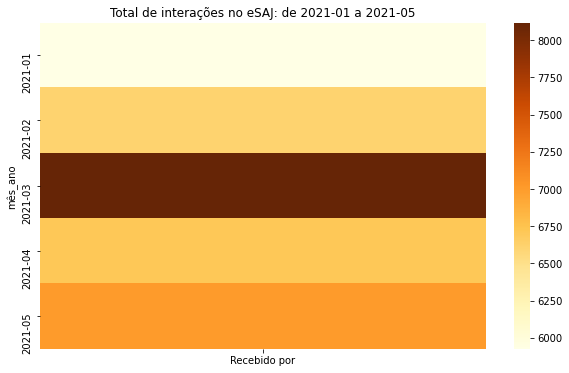

In [15]:
# Gráfico de calor 
plota_calor(total,'Total de interações no eSAJ', periodo)

In [16]:
# Exportação das informações para planilha Excel
with pd.ExcelWriter('eSAJ.xlsx') as writer:  
  grouped.to_excel(writer, sheet_name='Por cargo')
  grouped1.to_excel(writer, sheet_name='Por usuário')

In [17]:
# Criação de arquivos 'csv' para plotagem externa
grouped.to_csv('eSAJ_cargo.csv')
grouped1.to_csv('eSAJ_usuario.csv')
total.to_csv('eSAJ_total.csv')

In [18]:
# Varas Criminais
criterio = atos_periodo['Vara'].isin(sel_varas_criminais)
contagem_de_assuntos = atos_periodo[criterio].groupby('Assunto principal')['Número do processo'].nunique().sort_values(ascending=False)
contagem_de_assuntos.head(50)

Assunto principal
Tráfico de Drogas e Condutas Afins                                                                                          892
Ameaça                                                                                                                      745
Furto Qualificado                                                                                                           429
Estelionato                                                                                                                 380
Decorrente de Violência Doméstica                                                                                           372
Furto                                                                                                                       322
Crimes de Trânsito                                                                                                          303
Roubo                                                                                 

In [ ]:
# DIPO e Varas Criminais - Barra Funda
criterio = atos_periodo['Vara'].isin(sel_varas_criminais) | atos_periodo['Vara'].isin(sel_dipo)
contagem_de_assuntos = atos_periodo[criterio].groupby('Assunto principal')['Número do processo'].nunique().sort_values(ascending=False)
contagem_de_assuntos.head(50)

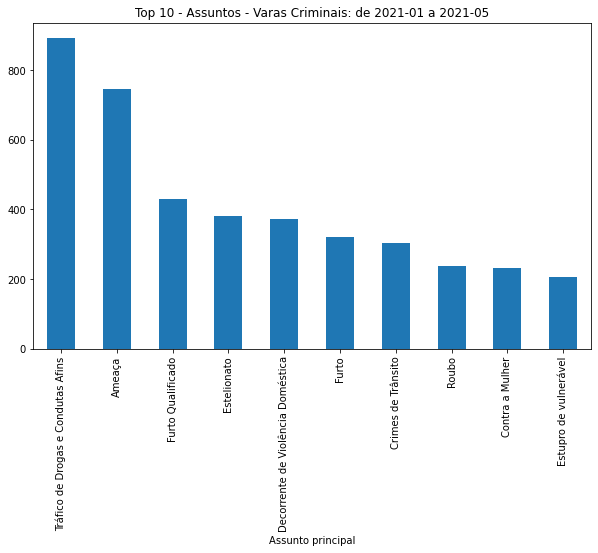

In [19]:
plota_barras (contagem_de_assuntos.nlargest(10), 'Top 10 - Assuntos - Varas Criminais', periodo)

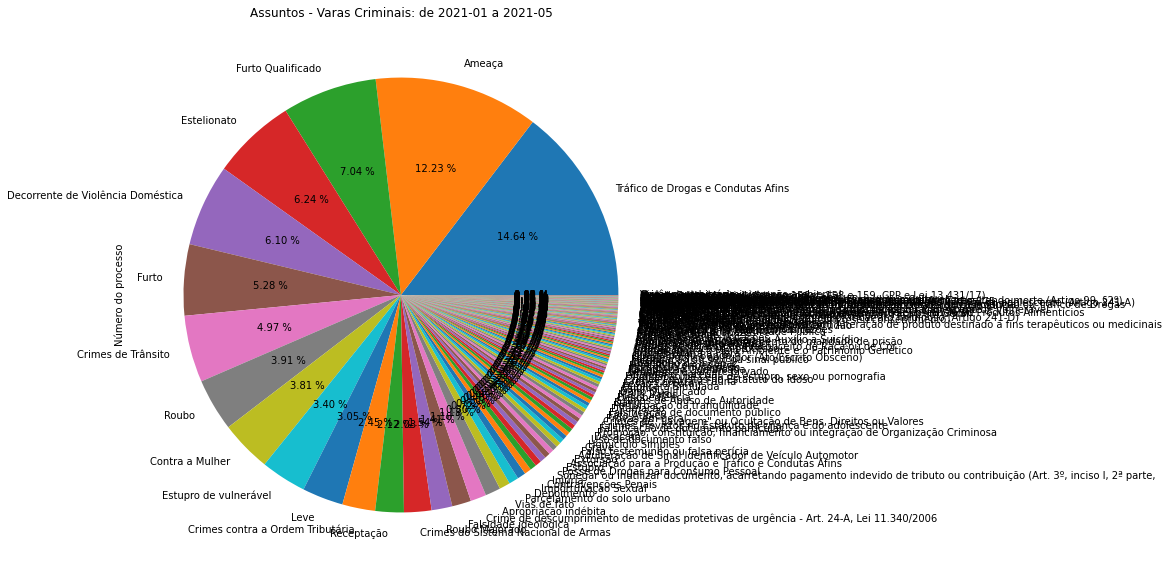

<Figure size 432x288 with 0 Axes>

In [20]:
plota_pizza(contagem_de_assuntos, 'Assuntos - Varas Criminais', periodo)

In [21]:
#Vara das Execuções
criterio = atos_periodo['Vara'].isin(sel_varas_exec)
contagem_de_assuntos_exec = atos_periodo[criterio].groupby('Assunto principal')['Número do processo'].nunique().sort_values(ascending=False)
contagem_de_assuntos_exec.head(30)

Assunto principal
Pena de Multa                                                              559
Regime inicial - Aberto                                                    214
Aberto                                                                     190
Petição intermediária                                                      188
Prestação de Serviços à Comunidade                                         171
Homicídio Qualificado                                                      131
Suspensão Condicional da Pena - SURSIS                                      85
Fato Atípico                                                                83
Pena Restritiva de Direitos                                                 55
Prestação Pecuniária                                                        52
Homicídio Simples                                                           49
Livramento Condicional                                                      35
Suspensão Condicional da Pena - SU

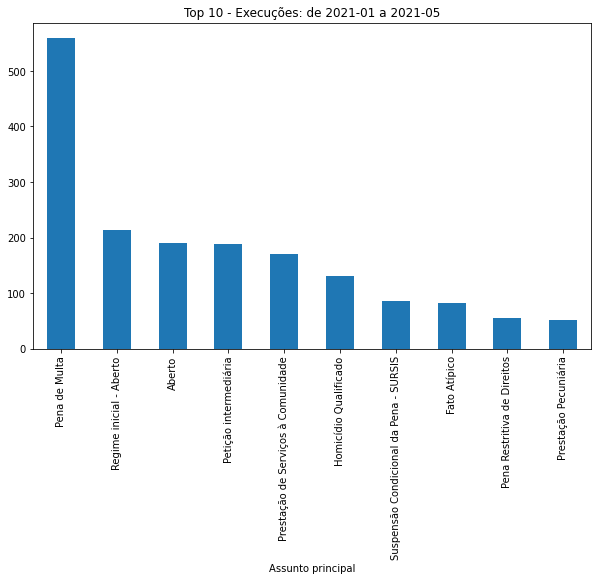

In [22]:
plota_barras (contagem_de_assuntos_exec.nlargest(10), 'Top 10 - Execuções', periodo)

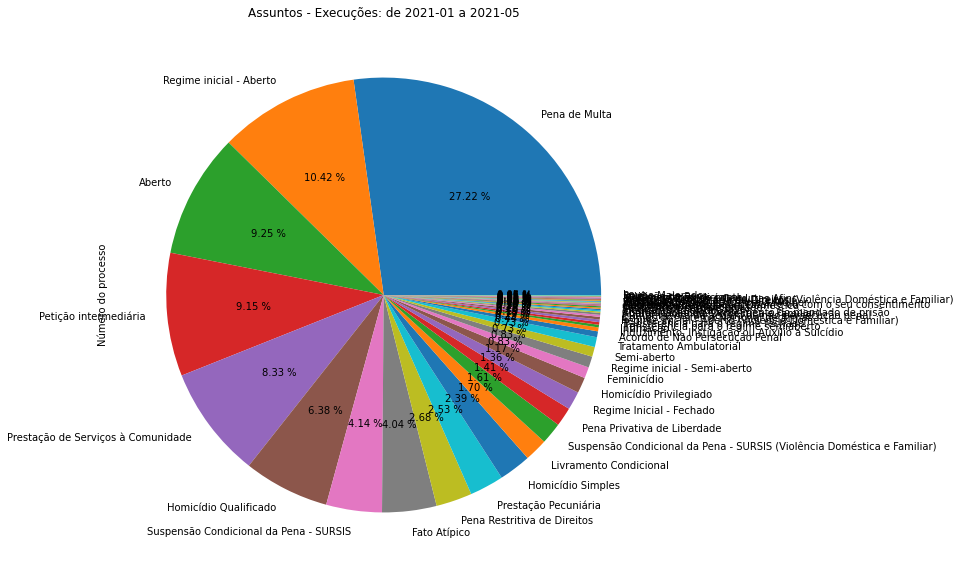

<Figure size 432x288 with 0 Axes>

In [23]:
plota_pizza(contagem_de_assuntos_exec, 'Assuntos - Execuções', periodo)

In [24]:
#Varas Especializadas
criterio = atos_periodo['Vara'].isin(sel_varas_especializadas)
contagem_de_assuntos_esp = atos_periodo[criterio].groupby('Assunto principal')['Número do processo'].nunique().sort_values(ascending=False)
contagem_de_assuntos_esp.head(50)

Assunto principal
Crimes de Trânsito                                                          139
Ameaça                                                                      132
Contravenções Penais                                                        116
Posse de Drogas para Consumo Pessoal                                        105
Leve                                                                         78
Fato Atípico                                                                 48
Injúria                                                                      39
Calúnia                                                                      38
Difamação                                                                    34
Desacato                                                                     31
Desobediência                                                                30
Maus Tratos                                                                  27
Crimes contra a Fauna 

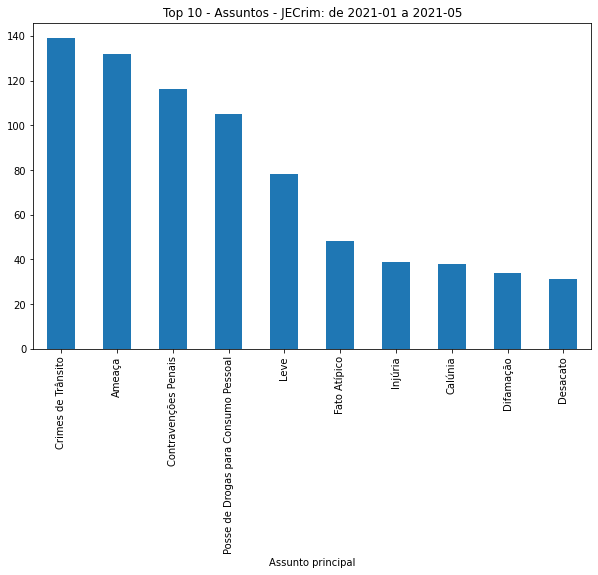

In [25]:
plota_barras (contagem_de_assuntos_esp.nlargest(10), 'Top 10 - Assuntos - JECrim', periodo)

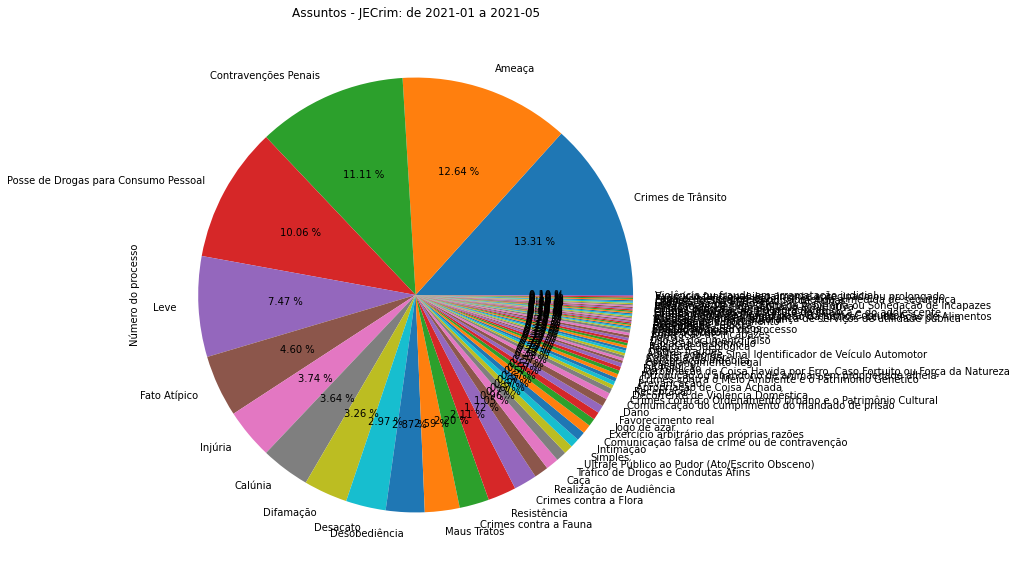

<Figure size 432x288 with 0 Axes>

In [26]:
plota_pizza(contagem_de_assuntos_esp, 'Assuntos - JECrim', periodo)

In [27]:
atos['Especialização'].unique()

array(['Criminal', 'Família', 'Jecrim', 'Mandado de Segurança', 'Cível',
       'Infância e Juventude - Individual', 'Execuções Criminais',
       'Criminal - 1ª VCrim', 'Júri', 'Meio Ambiente',
       'Infância - Ato Infracional', 'Patrimônio Público', 'Falências',
       'Infância e Juventude - Difusos', 'Registros Públicos', 'GEVID',
       'GAECO', nan, 'Consumidor', 'Criminal - 2ª VCrim',
       'Subprocuradoria Jurídica', 'Habitação e Urbanismo',
       'Criminal - 13ª VCrim', 'Juizado Especial da Fazenda Pública'],
      dtype=object)

In [28]:
# Assuntos por Especialização
sel_especializacao = ['GAECO']
criterio = atos_periodo['Especialização'].isin(sel_especializacao)
contagem_de_assuntos_mp_espec = atos_periodo[criterio].groupby('Assunto principal')['Número do processo'].nunique().sort_values(ascending=False)
contagem_de_assuntos_mp_espec.head(50)

Assunto principal
Promoção, constituição, financiamento ou integração de Organização Criminosa                   11
Crimes de "Lavagem" ou Ocultação de Bens, Direitos ou Valores                                   9
Quadrilha ou Bando                                                                              3
Corrupção passiva                                                                               2
Associação para a Produção e Tráfico e Condutas Afins                                           2
Homicídio Simples                                                                               1
Falsificação de documento público                                                               1
Falsidade ideológica                                                                            1
Crimes do Sistema Nacional de Armas                                                             1
Crimes contra a Ordem Tributária                                                                1
Cr

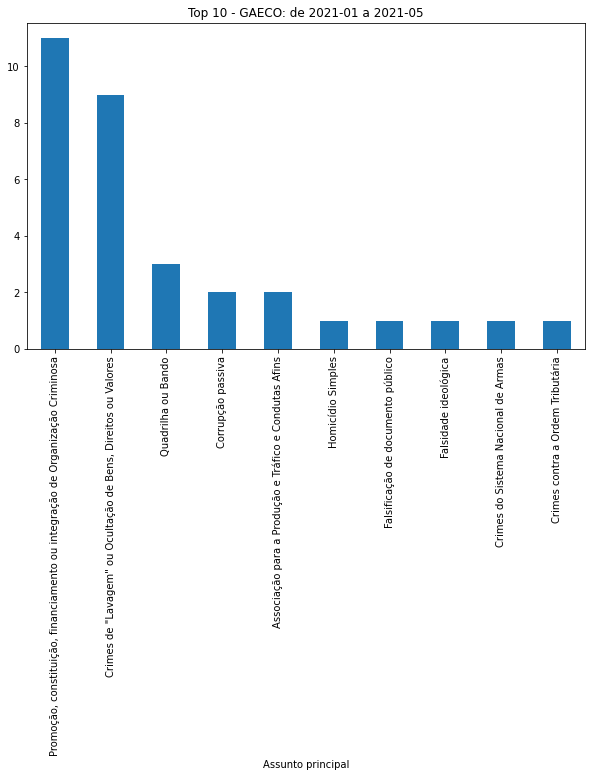

In [29]:
plota_barras (contagem_de_assuntos_mp_espec.nlargest(10), 'Top 10 - GAECO', periodo)

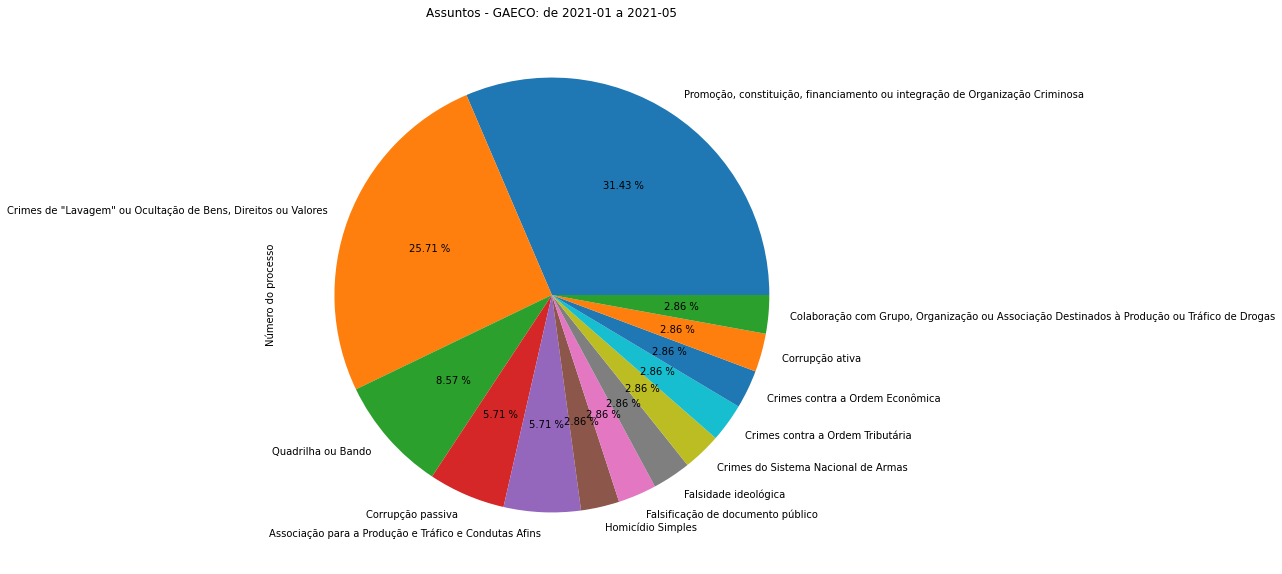

<Figure size 432x288 with 0 Axes>

In [30]:
plota_pizza(contagem_de_assuntos_mp_espec, 'Assuntos - GAECO', periodo)

In [31]:
# Assuntos por Promotor de Justiça
sel_cargo = '006º PROMOTOR DE JUSTIÇA'
criterio = (atos_periodo['Cargo'] == sel_cargo)
atos_pj = atos_periodo[criterio]

In [32]:
# Análise do volume total de interações no período
total_pj = atos_pj.groupby('mês_ano')['Recebido por'].count().to_frame()
total_pj

,Recebido por
mês_ano,
2021-01,324
2021-02,324
2021-03,373
2021-04,301
2021-05,325


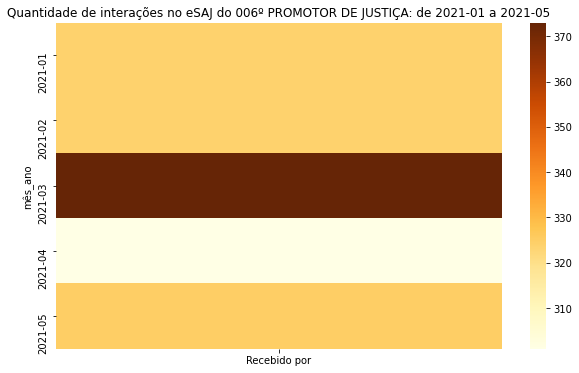

In [33]:
# Gráfico de calor 
plota_calor(total_pj,'Quantidade de interações no eSAJ do ' + sel_cargo, periodo)

In [34]:
criterio = atos_periodo['Cargo'] == sel_cargo
contagem_de_assuntos_pj = atos_pj.groupby('Assunto principal')['Número do processo'].nunique().sort_values(ascending=False)
contagem_de_assuntos_pj.head(30)

Assunto principal
Tráfico de Drogas e Condutas Afins                                                                                          119
Ameaça                                                                                                                       91
Furto Qualificado                                                                                                            59
Furto                                                                                                                        48
Estelionato                                                                                                                  44
Roubo                                                                                                                        44
Leve                                                                                                                         41
Decorrente de Violência Doméstica                                                     

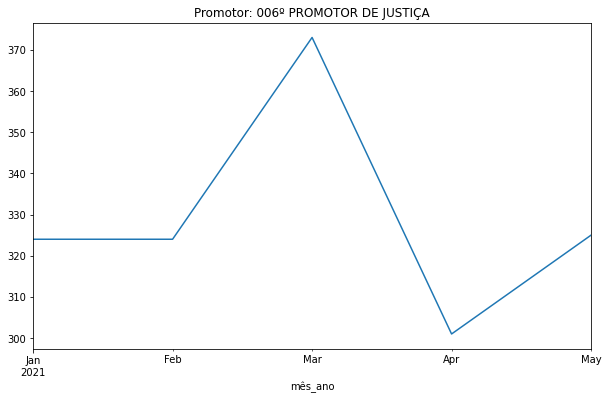

In [35]:
total_pj.plot(figsize=(10,6),legend='', title='Promotor: ' + sel_cargo)

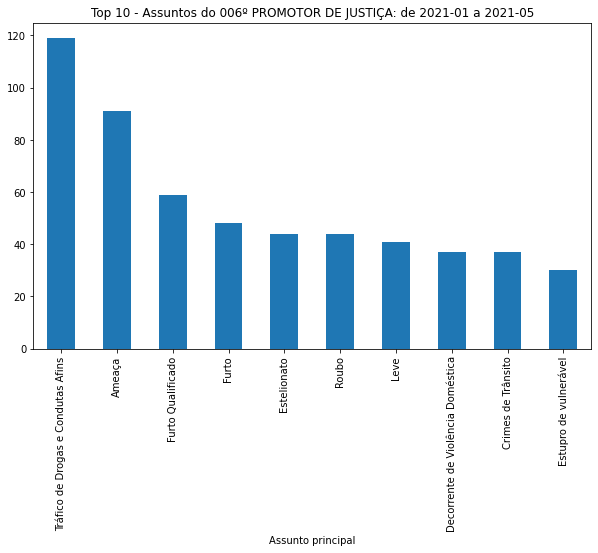

In [36]:
plota_barras (contagem_de_assuntos_pj.nlargest(10), 'Top 10 - Assuntos do ' + sel_cargo, periodo)

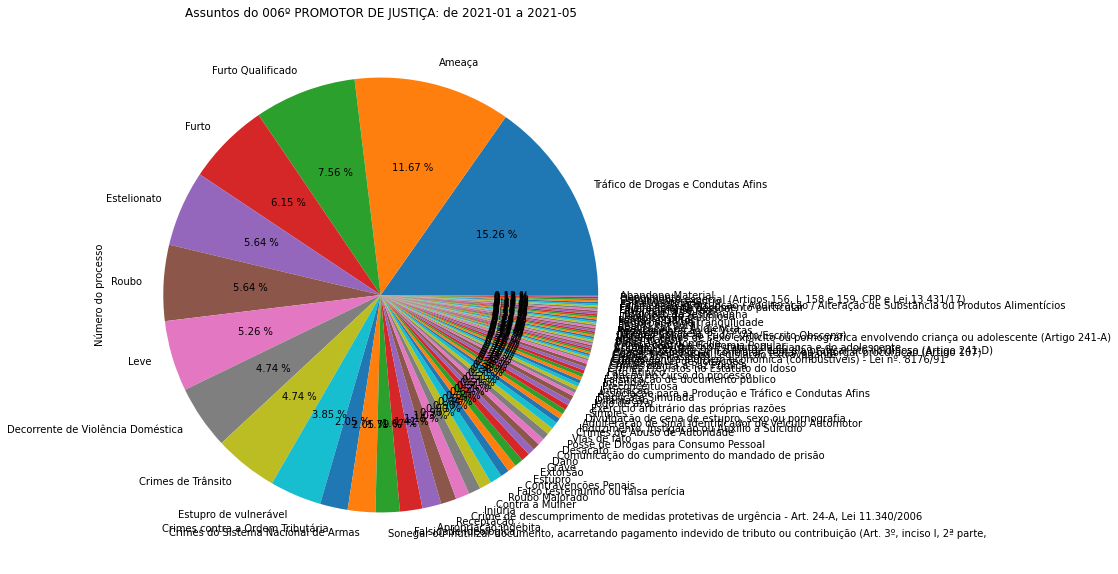

<Figure size 432x288 with 0 Axes>

In [37]:
plota_pizza(contagem_de_assuntos_pj, 'Assuntos do ' + sel_cargo, periodo)

In [38]:
# Análise do volume total de interações no período por assunto e PJ específico
total_ind_proc = atos_pj.groupby(['mês_ano', 'Assunto principal','Número do processo'])['Número do processo'].count().to_frame()
total_ind_proc

Número do processo
mês_ano Assunto principal                                  Número do processo                           
2021-01 Abandono Material                                  1547234-11.2020.8.26.0451                   1
        Adulteração de Sinal Identificador de Veículo A... 1541822-02.2020.8.26.0451                   1
        Ameaça                                             0010156-28.2018.8.26.0451                   1
                                                           0010218-68.2018.8.26.0451                   2
                                                           0016891-14.2017.8.26.0451                   1
...                                                                                                  ...
2021-05 Tráfico de Drogas e Condutas Afins                 1543395-75.2020.8.26.0451                   1
                                                           1547138-93.2020.8.26.0451                   1
        Ultraje Público ao Pudor (Ato/Escrito Obsceno)     1509736-12.2019.8.26.0451                   1
        Vias de fato                                       1501788-48.2021.8.26.0451                   1
        Violação de domicílio                              1500049-18.2020.8.26.0599                   1

[1262 rows x 1 columns]

In [39]:
# Análise do volume total de interações no período por PJ específico, excluídos os retornos do mesmo processo
total_ind_proc_s_retorno = atos_pj.groupby(['mês_ano', 'Assunto principal'])['Número do processo'].nunique().to_frame()
total_ind_proc_s_retorno

Número do processo
mês_ano Assunto principal                                                     
2021-01 Abandono Material                                                    1
        Adulteração de Sinal Identificador de Veículo A...                   1
        Ameaça                                                              50
        Apropriação indébita                                                 1
        Assediar criança com o fim de com ela praticar ...                   1
...                                                                        ...
2021-05 Sonegar ou inutilizar documento, acarretando pa...                   5
        Tráfico de Drogas e Condutas Afins                                  44
        Ultraje Público ao Pudor (Ato/Escrito Obsceno)                       1
        Vias de fato                                                         1
        Violação de domicílio                                                1

[255 rows x 1 columns]

In [40]:
maior_incidencia = contagem_de_assuntos_pj.nlargest(5)
lista_de_crimes = maior_incidencia.index
maior_incidencia

Assunto principal
Tráfico de Drogas e Condutas Afins    119
Ameaça                                 91
Furto Qualificado                      59
Furto                                  48
Estelionato                            44
Name: Número do processo, dtype: int64

In [41]:
criterio = atos_pj['Assunto principal'].isin(lista_de_crimes)
atos_pj_selec = atos_pj[criterio]
atos_pj_selec = atos_pj_selec[['Assunto principal','Número do processo']]
atos_pj_selec.reset_index(inplace=True)
atos_pj_selec

,mês_ano,Assunto principal,Número do processo
0,2021-05,Tráfico de Drogas e Condutas Afins,1500582-40.2021.8.26.0599
1,2021-05,Tráfico de Drogas e Condutas Afins,1500483-70.2021.8.26.0599
2,2021-05,Tráfico de Drogas e Condutas Afins,1500659-83.2020.8.26.0599
3,2021-05,Furto Qualificado,1501567-43.2020.8.26.0599
4,2021-05,Furto Qualificado,1510719-11.2019.8.26.0451
...,...,...,...
790,2021-01,Ameaça,1501852-70.2019.8.26.0599
791,2021-01,Furto Qualificado,1501437-53.2020.8.26.0599
792,2021-01,Furto Qualificado,1501567-77.2019.8.26.0599
793,2021-01,Tráfico de Drogas e Condutas Afins,1501565-73.2020.8.26.0599


In [42]:
atos_pj_selec_tot = atos_pj_selec.groupby(['mês_ano','Assunto principal'])['Número do processo'].count().to_frame()
atos_pj_selec_tot

Número do processo
mês_ano Assunto principal                                     
2021-01 Ameaça                                              66
        Estelionato                                         10
        Furto                                               14
        Furto Qualificado                                   31
        Tráfico de Drogas e Condutas Afins                  43
2021-02 Ameaça                                              45
        Estelionato                                         10
        Furto                                               19
        Furto Qualificado                                   26
        Tráfico de Drogas e Condutas Afins                  55
2021-03 Ameaça                                              40
        Estelionato                                         18
        Furto                                               18
        Furto Qualificado                                   27
        Tráfico de Drogas e Condutas Afins                  66
2021-04 Ameaça                                              21
        Estelionato                                         20
        Furto                                               21
        Furto Qualificado                                   25
        Tráfico de Drogas e Condutas Afins                  68
2021-05 Ameaça                                              23
        Estelionato                                         14
        Furto                                               26
        Furto Qualificado                                   27
        Tráfico de Drogas e Condutas Afins                  62

In [43]:
atos_pj_selec_tot = pd.pivot_table(atos_pj_selec_tot, index='mês_ano', columns='Assunto principal').fillna(0)

In [44]:
atos_pj_selec_tot.sample(5)

Número do processo  ...                                   
Assunto principal             Ameaça  ... Tráfico de Drogas e Condutas Afins
mês_ano                               ...                                   
2021-02                           45  ...                                 55
2021-03                           40  ...                                 66
2021-05                           23  ...                                 62
2021-04                           21  ...                                 68
2021-01                           66  ...                                 43

[5 rows x 5 columns]

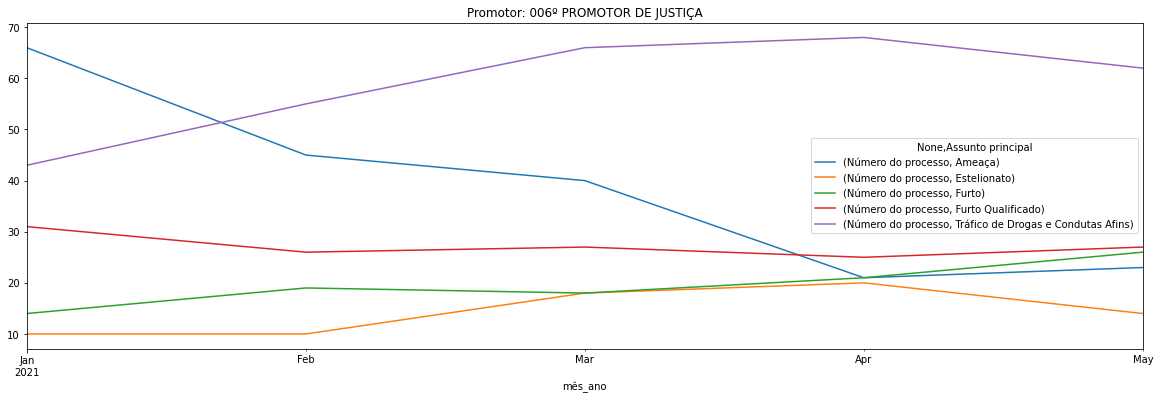

In [45]:
atos_pj_selec_tot.plot(figsize=(20,6), title='Promotor: ' + sel_cargo)

In [46]:
# Assuntos por Promotor de Justiça
sel_cargo = '011º PROMOTOR DE JUSTIÇA'
criterio = (atos_periodo['Cargo'] == sel_cargo)
atos_pj = atos_periodo[criterio]

In [47]:
# Análise do volume total de interações no período
total_pj = atos_pj.groupby('mês_ano')['Recebido por'].count().to_frame()
total_pj

,Recebido por
mês_ano,
2021-01,330
2021-02,361
2021-03,384
2021-04,383
2021-05,395


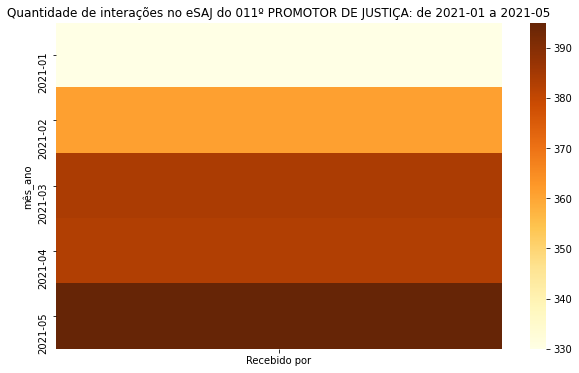

In [48]:
# Gráfico de calor 
plota_calor(total_pj,'Quantidade de interações no eSAJ do ' + sel_cargo, periodo)

In [49]:
criterio = atos_periodo['Cargo'] == sel_cargo
contagem_de_assuntos_pj = atos_pj.groupby('Assunto principal')['Número do processo'].nunique().sort_values(ascending=False)
contagem_de_assuntos_pj.head(30)

Assunto principal
Tráfico de Drogas e Condutas Afins                                                                                          147
Ameaça                                                                                                                      102
Leve                                                                                                                         67
Furto Qualificado                                                                                                            66
Estelionato                                                                                                                  52
Roubo                                                                                                                        46
Furto                                                                                                                        40
Crimes de Trânsito                                                                    

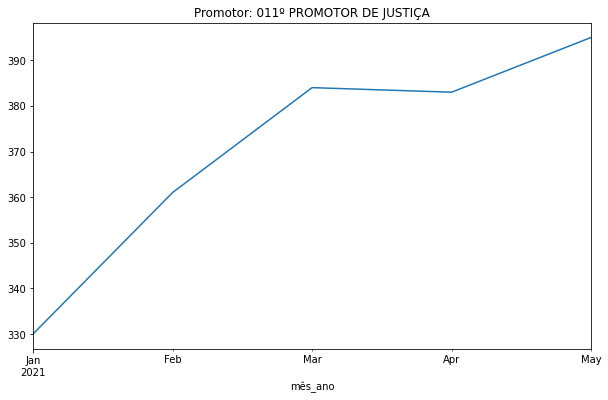

In [50]:
total_pj.plot(figsize=(10,6),legend='', title='Promotor: ' + sel_cargo)

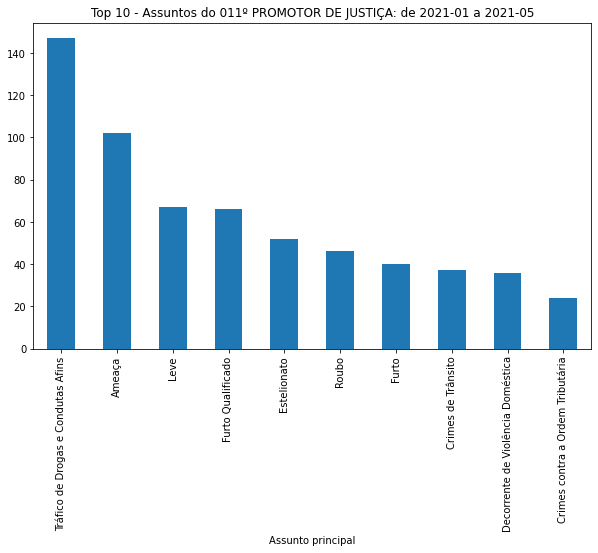

In [51]:
plota_barras (contagem_de_assuntos_pj.nlargest(10), 'Top 10 - Assuntos do ' + sel_cargo, periodo)

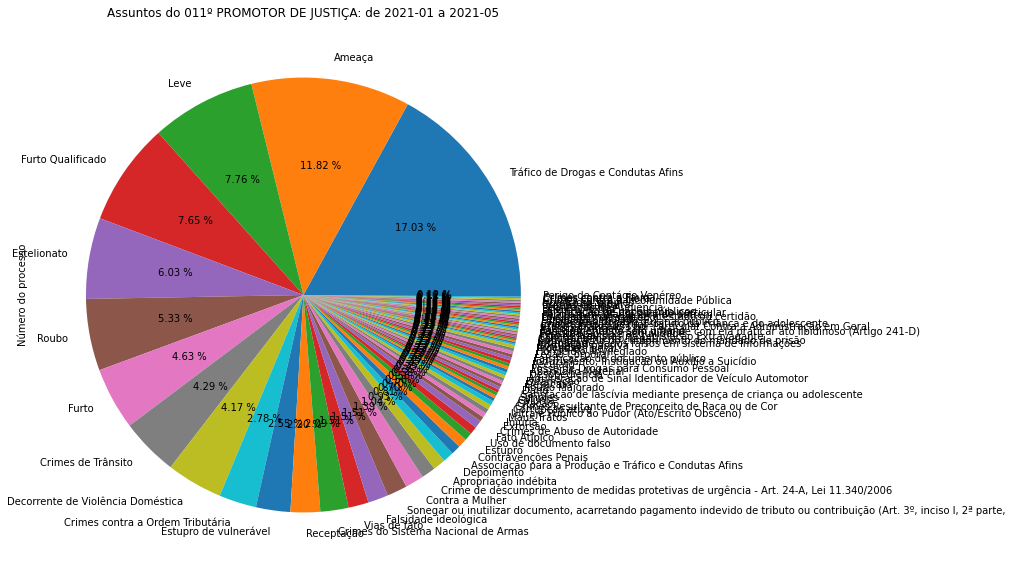

<Figure size 432x288 with 0 Axes>

In [52]:
plota_pizza(contagem_de_assuntos_pj, 'Assuntos do ' + sel_cargo, periodo)

In [53]:
# Análise do volume total de interações no período por assunto e PJ específico
total_ind_proc = atos_pj.groupby(['mês_ano', 'Assunto principal','Número do processo'])['Número do processo'].count().to_frame()
total_ind_proc

Número do processo
mês_ano Assunto principal                                  Número do processo                           
2021-01 Abandono Material                                  1541806-48.2020.8.26.0451                   1
        Adulteração de Sinal Identificador de Veículo A... 1546211-30.2020.8.26.0451                   1
        Ameaça                                             0001879-62.2014.8.26.0451                   1
                                                           0004896-96.2020.8.26.0451                   1
                                                           0005550-25.2016.8.26.0451                   1
...                                                                                                  ...
2021-05 Uso de documento falso                             1547140-63.2020.8.26.0451                   1
        Vias de fato                                       1500576-26.2020.8.26.0451                   1
                                                           1501761-65.2021.8.26.0451                   1
                                                           1509461-29.2020.8.26.0451                   1
                                                           1544743-31.2020.8.26.0451                   1

[1379 rows x 1 columns]

In [54]:
# Análise do volume total de interações no período por PJ específico, excluídos os retornos do mesmo processo
total_ind_proc_s_retorno = atos_pj.groupby(['mês_ano', 'Assunto principal'])['Número do processo'].nunique().to_frame()
total_ind_proc_s_retorno

Número do processo
mês_ano Assunto principal                                                     
2021-01 Abandono Material                                                    1
        Adulteração de Sinal Identificador de Veículo A...                   1
        Ameaça                                                              49
        Apropriação indébita                                                 2
        Associação para a Produção e Tráfico e Condutas...                   3
...                                                                        ...
2021-05 Sonegar ou inutilizar documento, acarretando pa...                   2
        Tráfico de Drogas e Condutas Afins                                  52
        Ultraje Público ao Pudor (Ato/Escrito Obsceno)                       3
        Uso de documento falso                                               2
        Vias de fato                                                         4

[236 rows x 1 columns]

In [55]:
maior_incidencia = contagem_de_assuntos_pj.nlargest(5)
lista_de_crimes = maior_incidencia.index
maior_incidencia

Assunto principal
Tráfico de Drogas e Condutas Afins    147
Ameaça                                102
Leve                                   67
Furto Qualificado                      66
Estelionato                            52
Name: Número do processo, dtype: int64

In [56]:
criterio = atos_pj['Assunto principal'].isin(lista_de_crimes)
atos_pj_selec = atos_pj[criterio]
atos_pj_selec = atos_pj_selec[['Assunto principal','Número do processo']]
atos_pj_selec.reset_index(inplace=True)
atos_pj_selec

,mês_ano,Assunto principal,Número do processo
0,2021-05,Furto Qualificado,1501652-63.2019.8.26.0599
1,2021-05,Leve,1501815-43.2019.8.26.0599
2,2021-05,Tráfico de Drogas e Condutas Afins,3015662-07.2013.8.26.0451
3,2021-05,Tráfico de Drogas e Condutas Afins,1501153-45.2020.8.26.0599
4,2021-05,Tráfico de Drogas e Condutas Afins,1500209-43.2020.8.26.0599
...,...,...,...
982,2021-01,Leve,1532499-70.2020.8.26.0451
983,2021-01,Furto Qualificado,1546216-52.2020.8.26.0451
984,2021-01,Ameaça,1500583-18.2020.8.26.0451
985,2021-01,Ameaça,1546222-59.2020.8.26.0451


In [57]:
atos_pj_selec_tot = atos_pj_selec.groupby(['mês_ano','Assunto principal'])['Número do processo'].count().to_frame()
atos_pj_selec_tot

Número do processo
mês_ano Assunto principal                                     
2021-01 Ameaça                                              65
        Estelionato                                         15
        Furto Qualificado                                   23
        Leve                                                31
        Tráfico de Drogas e Condutas Afins                  65
2021-02 Ameaça                                              31
        Estelionato                                         16
        Furto Qualificado                                   27
        Leve                                                28
        Tráfico de Drogas e Condutas Afins                  82
2021-03 Ameaça                                              41
        Estelionato                                         23
        Furto Qualificado                                   20
        Leve                                                41
        Tráfico de Drogas e Condutas Afins                  84
2021-04 Ameaça                                              40
        Estelionato                                         22
        Furto Qualificado                                   49
        Leve                                                24
        Tráfico de Drogas e Condutas Afins                  77
2021-05 Ameaça                                              18
        Estelionato                                         21
        Furto Qualificado                                   46
        Leve                                                14
        Tráfico de Drogas e Condutas Afins                  84

In [58]:
atos_pj_selec_tot = pd.pivot_table(atos_pj_selec_tot, index='mês_ano', columns='Assunto principal').fillna(0)

In [59]:
atos_pj_selec_tot.sample(5)

Número do processo  ...                                   
Assunto principal             Ameaça  ... Tráfico de Drogas e Condutas Afins
mês_ano                               ...                                   
2021-03                           41  ...                                 84
2021-02                           31  ...                                 82
2021-01                           65  ...                                 65
2021-04                           40  ...                                 77
2021-05                           18  ...                                 84

[5 rows x 5 columns]

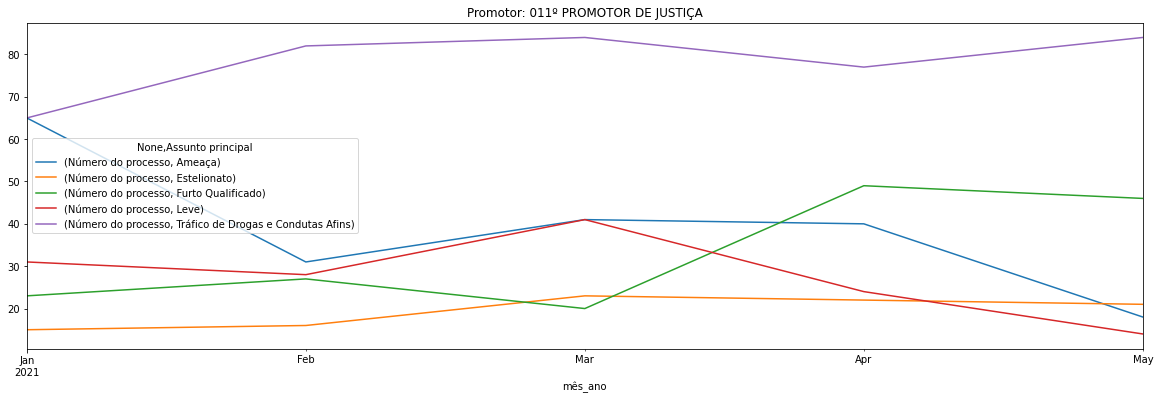

In [60]:
atos_pj_selec_tot.plot(figsize=(20,6), title='Promotor: ' + sel_cargo)

In [61]:
# Criação da planilha Excel com as classes de processos em trâmite no período
with pd.ExcelWriter('eSAJ_classes.xlsx') as writer:
  for cargo in sel_promotores_criminais:
    criterio = (atos_periodo['Cargo'] == cargo)
    classe_pj = atos_periodo[criterio]
    classe_pj.groupby(['mês_ano', 'Classe principal'])['Número do processo'].nunique().to_excel(writer, sheet_name=cargo + ' mês')
    classe_pj.groupby(['Classe principal'])['Número do processo'].nunique().to_excel(writer, sheet_name=cargo + ' total')

In [62]:
criterio = atos_periodo['Cargo'] == '006º PROMOTOR DE JUSTIÇA'
atos_periodo[criterio].groupby(['Classe principal'])['Número do processo'].nunique()

Classe principal
Alienação de Bens do Acusado                                                1
Arresto / Hipoteca Legal                                                    1
Auto de Prisão em Flagrante                                                44
Ação Penal - Procedimento Ordinário                                       243
Ação Penal - Procedimento Sumário                                          30
Carta Precatória Criminal                                                   5
Cautelar Inominada Criminal                                                 3
Crimes de Calúnia, Injúria e Difamação de Competência do Juiz Singular      2
Exceção de Incompetência de Juízo                                           1
Incidente de Sanidade Mental                                                1
Inquérito Policial                                                        349
Insanidade Mental do Acusado                                                2
Interdição                                     

In [63]:
criterio = atos_periodo['Cargo'] == '011º PROMOTOR DE JUSTIÇA'
atos_periodo[criterio].groupby(['Classe principal'])['Número do processo'].nunique()

Classe principal
Auto de Prisão em Flagrante                                                44
Avaliação para atestar dependência de drogas                                1
Ação Penal - Procedimento Ordinário                                       285
Ação Penal - Procedimento Sumaríssimo                                       1
Ação Penal - Procedimento Sumário                                          32
Ação Penal de Competência do Júri                                           1
Carta Precatória Criminal                                                   5
Cautelar Inominada Criminal                                                 2
Crimes de Calúnia, Injúria e Difamação de Competência do Juiz Singular      1
Habeas Corpus Criminal                                                      1
Inquérito Policial                                                        350
Insanidade Mental do Acusado                                                2
Medidas Protetivas de urgência (Lei Maria da Pe

In [64]:
classes_por_cargo = atos_periodo.groupby(['Cargo','Classe principal'])['Número do processo'].nunique().to_frame()
classes_por_cargo

Número do processo
Cargo                    Classe principal                                                      
001º PROMOTOR DE JUSTIÇA Adoção                                                               1
                         Alienação Judicial de Bens                                           5
                         Alvará Judicial - Lei 6858/80                                        2
                         Auto de Prisão em Flagrante                                          3
                         Averiguação de Paternidade                                           3
...                                                                                         ...
150º PROMOTOR DE JUSTIÇA Medidas Investigatórias Sobre Organizações Crim...                   2
                         Pedido de Busca e Apreensão Criminal                                 1
                         Pedido de Quebra de Sigilo de Dados e/ou Telefô...                   1
                         Restituição de Coisas Apreendidas                                    1
                         Seqüestro                                                            1

[535 rows x 1 columns]

In [65]:
totalizacao = pd.pivot_table(classes_por_cargo, index='Classe principal', columns='Cargo', aggfunc='sum').fillna(0)
totalizacao

Número do processo  ...                         
Cargo                                          001º PROMOTOR DE JUSTIÇA  ... 150º PROMOTOR DE JUSTIÇA
Classe principal                                                         ...                         
Abertura, Registro e Cumprimento de Testamento                      0.0  ...                      0.0
Adoção                                                              1.0  ...                      0.0
Adoção c/c Destituição do Poder Familiar                            0.0  ...                      0.0
Agravo de Execução Penal                                            0.0  ...                      0.0
Alienação Judicial de Bens                                          5.0  ...                      0.0
...                                                                 ...  ...                      ...
Tutela Cível                                                        0.0  ...                      0.0
Tutela Infância e Juventude                                         0.0  ...                      0.0
Tutela e Curatela - Nomeação                                        0.0  ...                      0.0
Tutela e Curatela - Remoção e Dispensa                              0.0  ...                      0.0
Usucapião                                                          37.0  ...                      0.0

[154 rows x 27 columns]

In [66]:
classes_por_recebedor = atos_periodo.groupby(['Recebido por','Classe principal'])['Número do processo'].nunique().to_frame()
classes_por_recebedor

Número do processo
Recebido por Classe principal                                     
ALUISIO AN   Agravo de Execução Penal                           31
             Auto de Prisão em Flagrante                         3
             Ação Penal de Competência do Júri                  84
             Carta Precatória Criminal                           5
             Cautelar Inominada Criminal                         1
...                                                            ...
Érika Ange   Separação Litigiosa                                 2
             Separação de Corpos                                 1
             Tutela Cautelar Antecedente                         4
             Tutela Cível                                        3
             Tutela e Curatela - Nomeação                        6

[550 rows x 1 columns]

In [67]:
totalizacao1 = pd.pivot_table(classes_por_recebedor, index='Classe principal', columns='Recebido por', aggfunc='sum').fillna(0)
totalizacao1

Número do processo  ...           
Recebido por                                           ALUISIO AN  ... Érika Ange
Classe principal                                                   ...           
Abertura, Registro e Cumprimento de Testamento                0.0  ...        8.0
Adoção                                                        0.0  ...        0.0
Adoção c/c Destituição do Poder Familiar                      0.0  ...        0.0
Agravo de Execução Penal                                     31.0  ...        0.0
Alienação Judicial de Bens                                    0.0  ...        2.0
...                                                           ...  ...        ...
Tutela Cível                                                  0.0  ...        3.0
Tutela Infância e Juventude                                   0.0  ...        0.0
Tutela e Curatela - Nomeação                                  0.0  ...        6.0
Tutela e Curatela - Remoção e Dispensa                        0.0  ...        0.0
Usucapião                                                     0.0  ...        0.0

[154 rows x 22 columns]

In [68]:
classes_por_recebedor1 = atos_periodo.groupby(['Recebido por','Classe principal','Assunto principal', 'Número do processo'])['Número do processo'].nunique()
classes_por_recebedor1

Recebido por  Classe principal              Assunto principal            Número do processo       
ALUISIO AN    Agravo de Execução Penal      Pena Privativa de Liberdade  0002842-66.2020.8.26.0158    1
                                            Petição intermediária        0000043-10.2021.8.26.0451    1
                                                                         0000258-83.2021.8.26.0451    1
                                                                         0001655-80.2021.8.26.0451    1
                                                                         0002144-20.2021.8.26.0451    1
                                                                                                     ..
Érika Ange    Tutela e Curatela - Nomeação  Tutela e Curatela            1001538-48.2016.8.26.0451    1
                                                                         1010099-90.2018.8.26.0451    1
                                                                     

In [69]:
classes_por_recebedor1 = atos_periodo.groupby(['Recebido por','Classe principal','Assunto principal'])['Número do processo'].nunique().to_frame()
classes_por_recebedor1

Número do processo
Recebido por Classe principal             Assunto principal                                     
ALUISIO AN   Agravo de Execução Penal     Pena Privativa de Liberdade                          1
                                          Petição intermediária                               21
                                          Prestação de Serviços à Comunidade                   1
                                          Regime Inicial - Fechado                             1
                                          Regime inicial - Aberto                              4
...                                                                                          ...
Érika Ange   Tutela Cautelar Antecedente  Revisão                                              1
             Tutela Cível                 Nomeação                                             2
                                          Tutela de Urgência                                   1
             Tutela e Curatela - Nomeação Família                                              1
                                          Tutela e Curatela                                    5

[2787 rows x 1 columns]

In [70]:
classes_por_recebedor1.to_csv('totalizacao.csv')

In [71]:
with pd.ExcelWriter('totalizacao.xlsx') as writer:
  classes_por_recebedor1.to_excel(writer, sheet_name= 'resumão')
  totalizacao.to_excel(writer, sheet_name= 'cargo')
  totalizacao1.to_excel(writer, sheet_name= 'recebedor')